In [1]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datatime для работы с датами
import datetime
from datetime import datetime, date

# задаем некоторые опции библиотеки pandas, которые настраивают вывод
pd.set_option('display.notebook_repr_html', False)     # задаем вывод в виде текста, а не HTML
pd.set_option('display.max_columns', 8)                # устанавливаем отображение максимального количества стобцов
pd.set_option('display.max_rows', 10)                  # устанавливаем отображение максимального количества строк
pd.set_option('display.width', 80)                     # устанавливаеv максимальную ширину отображения в символах

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt 
%matplotlib inline

# задаем стартовое значение для генератора случайных чисел
seedval = 111111

__СОЗДАНИЕ ГРАФИКОВ ВРЕМЕННЫХ РЯДОВ__

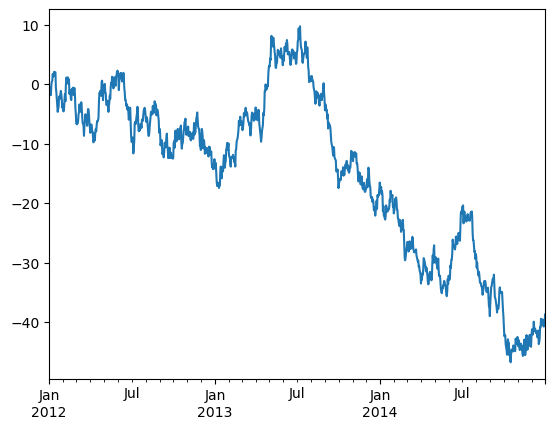

In [2]:
# визуализация с помощью метода .plot()
# генерируем временной ряд на основе случайного блуждания
np.random.seed(seedval)
s = pd.Series(np.random.randn(1096), index = pd.date_range('2012-01-01', '2014-12-31'))
walks_ts = s.cumsum()
walks_ts.plot();

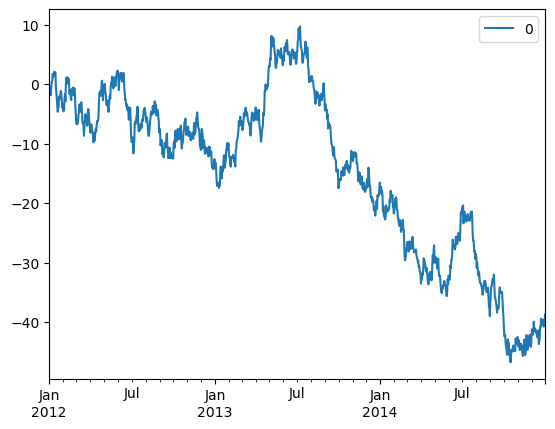

In [3]:
# визуализация объекта DataFrame с одним столбцом даст аналогичный результат с добавлением легенды
walk_df = pd.DataFrame(walks_ts)
walk_df.plot();

In [4]:
# если объект DataFrame состоит из нескольких столбцов, метод .plot() добавит несколько элементов в легенду и подберет
# для каждой линии свой цвет
# сгенерируем два случайных блуждания, которые станут двумя столбцами DataFrame
np.random.seed(seedval)
df = pd.DataFrame(np.random.randn(1096, 2),
                  index = walks_ts.index,
                  columns = list('AB'))
walk_df = df.cumsum()
walk_df.head()

                   A         B
2012-01-01 -1.878324  1.362367
2012-01-02 -2.804186  1.427261
2012-01-03 -3.241758  3.165368
2012-01-04 -2.750550  3.332685
2012-01-05 -1.620667  2.930017

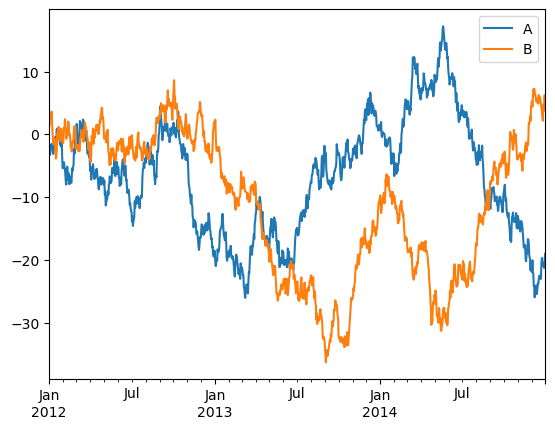

In [5]:
walk_df.plot();

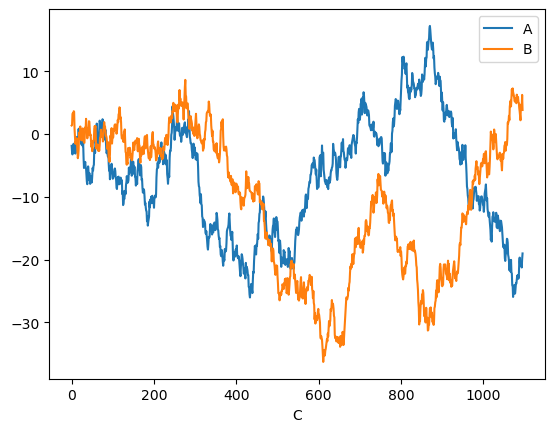

In [6]:
# если необходимо в качестве меток оси x использовать значения столбца DataFrame (вместо индексных меток) используйте 
# параметр x который позволяет задать имя столбца, представляющего метки.
# создаем копию случайного блуждания
df2 = walk_df.copy()
# добавляем столбец С который принимает значения от 0 до 1096
df2['C'] = pd.Series(np.arange(0, len(df2)), index = df2.index)
# в качестве меток оси Х получаем значения столбца С
df2.plot(x = 'C', y = ['A', 'B']);

__Настройка внешнего вида графика временного ряда__

Добавление заголовка и изменение подписей осей

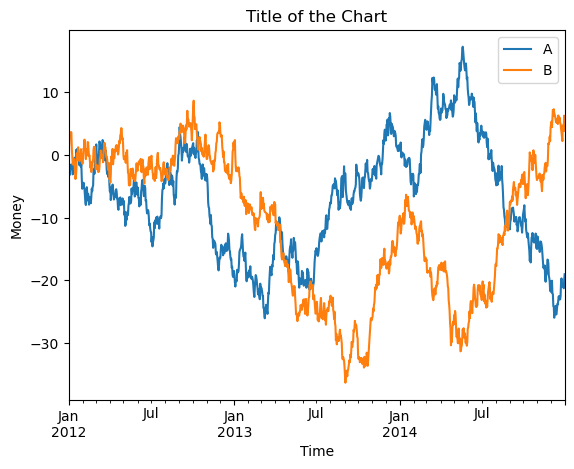

In [7]:
# создаем график временного ряда с заголовками и заданными подписями осей х и у
# заголовок создаем с помощью параметра title метода .plot()
walk_df.plot(title = 'Title of the Chart')
# после вызова метода .plot() явно задаем подписи осей х и у
plt.xlabel('Time')
plt.ylabel('Money');

Настройка содержимого легенды

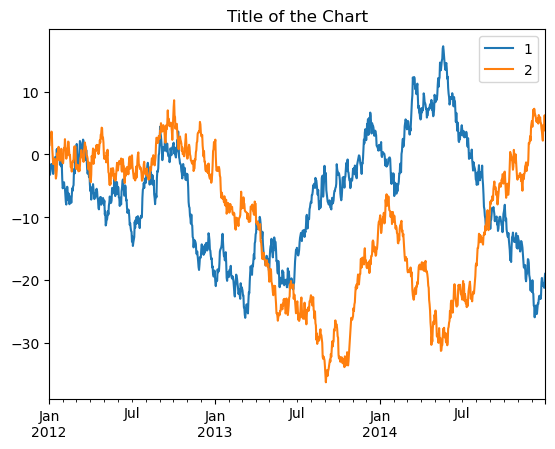

In [8]:
# изменяем элементы легенды, соответствующие именам столбцов датафрейма
ax = walk_df.plot(title = "Title of the Chart")
# эта строка задает метки легенды
ax.legend(['1', '2']);

In [9]:
# месторасположение легенды можно задать с помощью параметра loc метода .legend() По умолчанию библиотека pandas 
# задает местоположение 'best'

- __best__          код 0  - наилучшее расположение с учетом исследования графика
- __upper right__   код 1  - расположение в верхнем правом углу
- __upper left__    код 2  - расположение в верхнем левом углу
- __lower left__    код 3  - расположение в нижнем левом углу
- __lower right__   код 4  - расположение в нижнем правом углу
- __right__         код 5  - горизонтальное выравнивание справа с вертикальным выравниваем по центру
- __center left__   код 6  - вертикальное выравнивание по центру с горизонтальным выравниванием слева
- __center right__  код 7  - вертикальное выравнивание по центру с горизонтальным выравниванием справа
- __lower center__  код 8  - вертикальное выравнивание снизу с горизональным выравниваем по центру
- __upper center__  код 9  - вертикальное выравнивание сверху с горизональным выравниваем по центру
- __center__        код 10 - вертикальное выравнивание по центру с горизональным выравниваем по центру

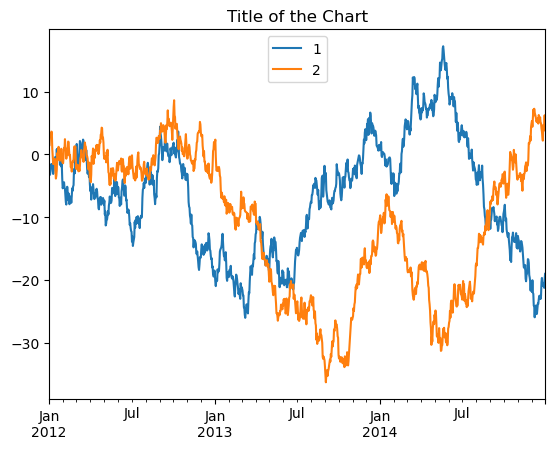

In [10]:
ax = walk_df.plot(title = "Title of the Chart")
ax.legend(['1', '2'], loc = 9);

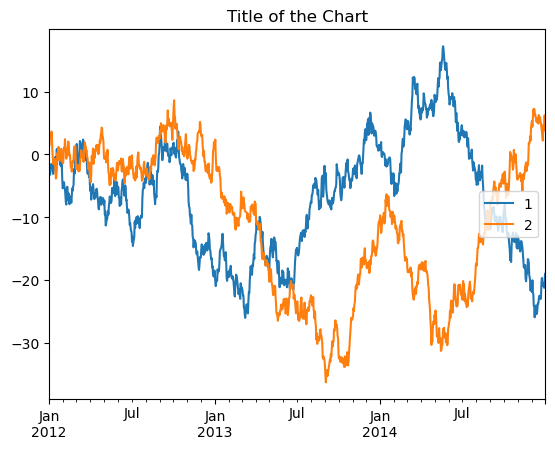

In [11]:
ax = walk_df.plot(title = "Title of the Chart")
ax.legend(['1', '2'], loc = 'right');

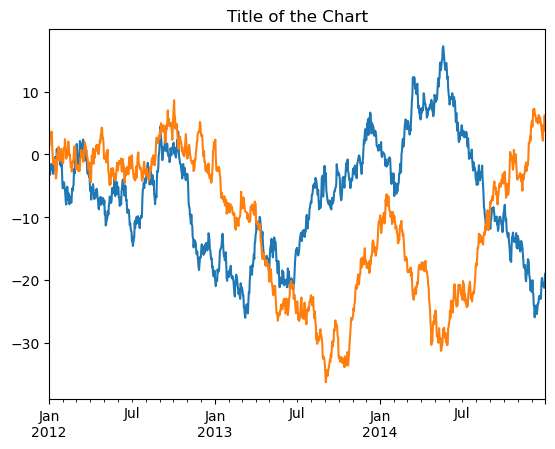

In [12]:
# Вывод легенды можно отключить с помощью параметра legend = False
walk_df.plot(title = "Title of the Chart", legend = False);

__Настройка цветов, стилей и маркеров линий__

Чтобы задать свои собственные цвета необходимо передать кодовые обозначения цветов параметру style функции plot
- __b__: синий
- __g__: зеленый 
- __r__: красный
- __c__: голубой
- __m__: пурпурный 
- __y__: желтый
- __k__: черный
- __w__: белый

Кроме того можно задать цвет с помощью шестнадцатеричного RGB кода в формате #RRGGBB

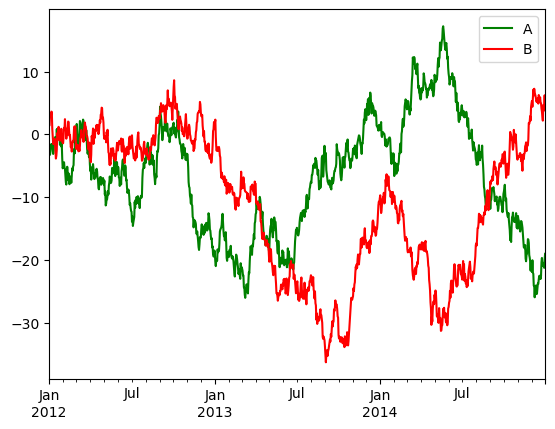

In [13]:
# меняем цвета линий графика, используя символьный код для первой линии и шестнадцатеричный RGB для второй
walk_df.plot(style = ['g', '#FF0000']);

Стили линий можно задать с помощью кодов стиля линий
- __'-'__ = сплошная линия
- __'--'__ = пунктирная линия
- __':'__ = точечная линая
- __'-.'__ = точечно пунктирная
- __'.'__ = точки 

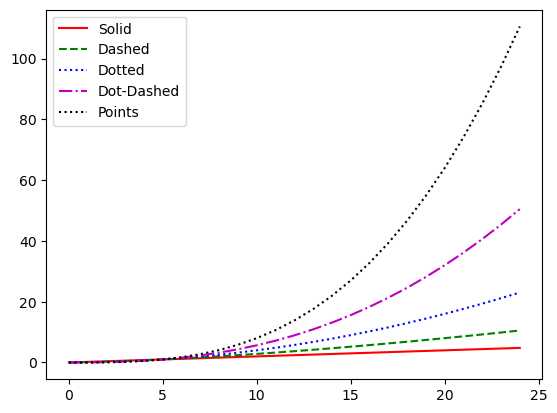

In [14]:
# демонстрируем различные стили линий
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted', 'Dot-Dashed', 'Points']
line_style = pd.DataFrame({0: t,
                           1: t**1.5,
                           2: t**2.0,
                           3: t**2.5,
                           4: t**3.0})
# создаем график задав цвет и стиль каждой линии
ax = line_style.plot(style = ['r-', 'g--', 'b:', 'm-.', 'k:'])
# задаем легенду
ax.legend(legend_labels, loc = 'upper left');

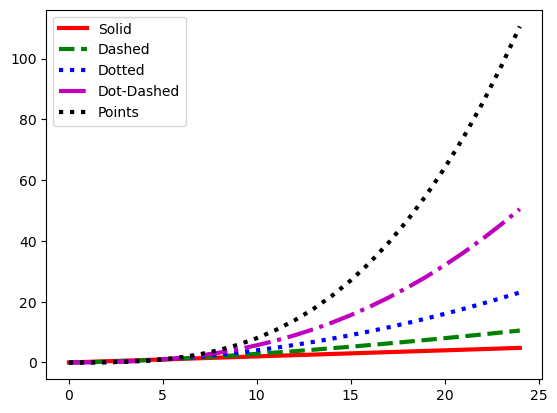

In [15]:
# толщину лини можно задать с помощью параметра lw
ax = line_style.plot(style = ['r-', 'g--', 'b:', 'm-.', 'k:'], lw = 3)
ax.legend(legend_labels, loc = 'upper left');

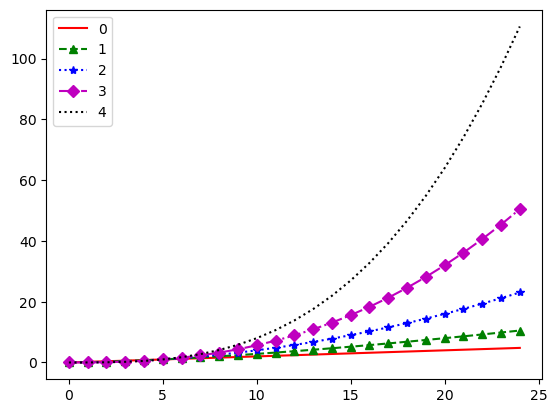

In [16]:
# маркеры линий можно указать с помощью специальных обозначений в програмном коде
x = line_style.plot(style = ['r-', 'g--^', 'b:*', 'm-.D', 'k:'])
ax.legend(legend_labels, loc = 'upper left');

__Настройка диапазона делений и меток делений шкалы__

array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

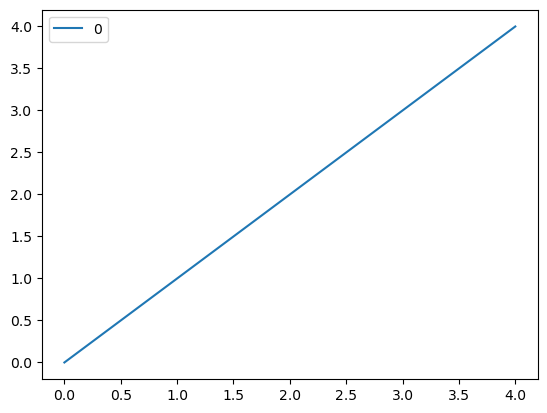

In [17]:
# значения которые библиотека pandas будет использовать в качестве меток делений можно найти с помощью функции 
# plt.xticks() эта функция возвращает два значения: значения для каждого деления и объекты представляющие фактические
# метки делений
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
ticks, labels = plt.xticks()
ticks

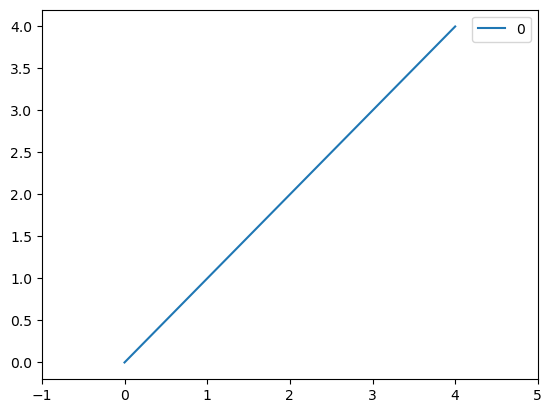

In [18]:
# если необходимо использовать другой диапазон делений необходимо передать значения в виде списка в plt.xticks()
ticks_data = pd.DataFrame(np.arange(0, 5))
ticks_data.plot()
plt.xticks(np.arange(-1, 6));

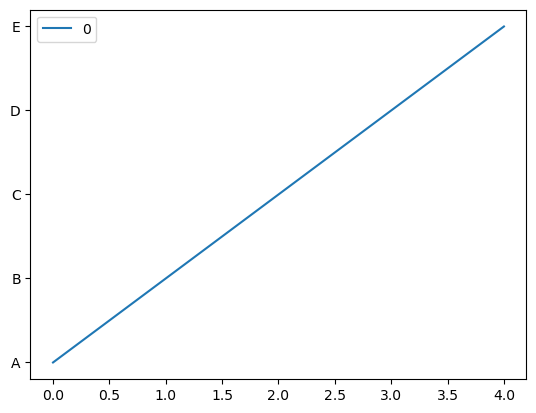

In [19]:
# метки делений можно задать передав их в качестве второго параметра
ticks_data = pd.DataFrame(np.arange(0, 5))
ticks_data.plot()
plt.yticks(np.arange(0, 5), list('ABCDE'));

__Форматирование меток делений, содержащих даты, с помощью форматтеров и локаторов__

Форматирование меток осей, содержащих даты и время, выполняется с помощью локаторов и форматтеров. __Локаторы__ задают расположение делений, а __форматтеры__ задают формат меток выводимых под делениями. 

- __MinuteLocator__ 
- __HourLocator__
- __DayLocator__
- __WeekdayLocator__
- __MonthLocator__
- __YearLocator__

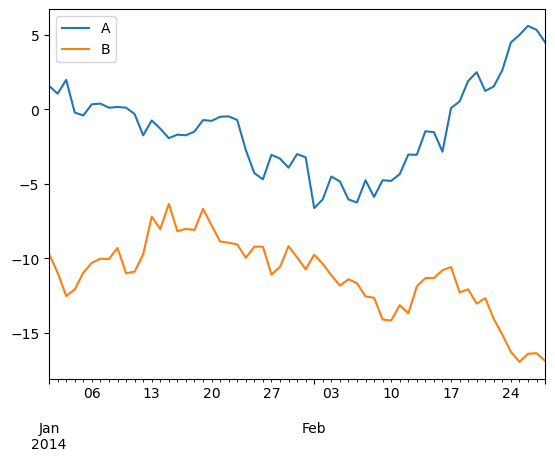

In [20]:
# визуализируем данные за январь - февраль 2014 на основе случайного блуждания
walk_df.loc['2014-01' : '2014-02'].plot();

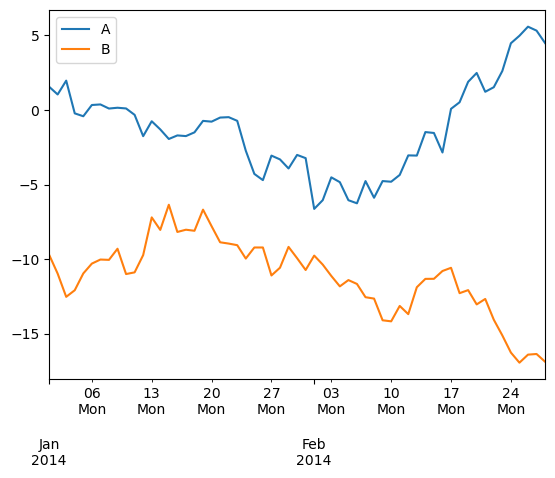

In [21]:
# импортируем необходимые локаторы и форматтеры
from matplotlib.dates import WeekdayLocator, DateFormatter, MonthLocator
ax = walk_df.loc['2014-01':'2014-02'].plot()
# настраиваем метки промежуточных делений
weekday_locator = WeekdayLocator(byweekday = (0), interval = 1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))
# настраиваем метки основных делений
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'))

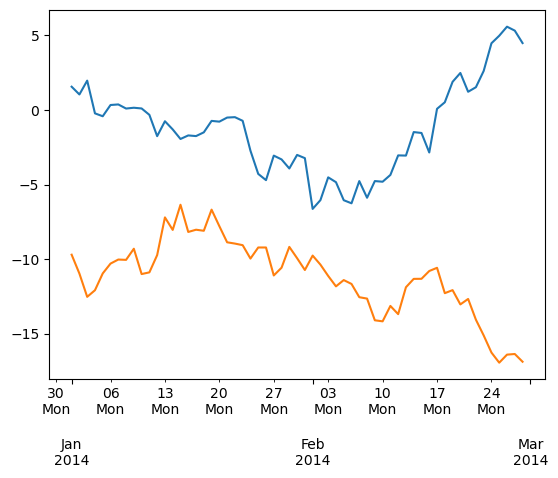

In [22]:
# создаем копию данных за январь-февраль 2014 года
walk_subset = walk_df['2014-01':'2014-02']
fig, ax = plt.subplots()
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')
# настраиваем метки промежуточных делений
weekday_locator = WeekdayLocator(byweekday = (0), interval = 1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))
# настраиваем метки основных делений
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'))

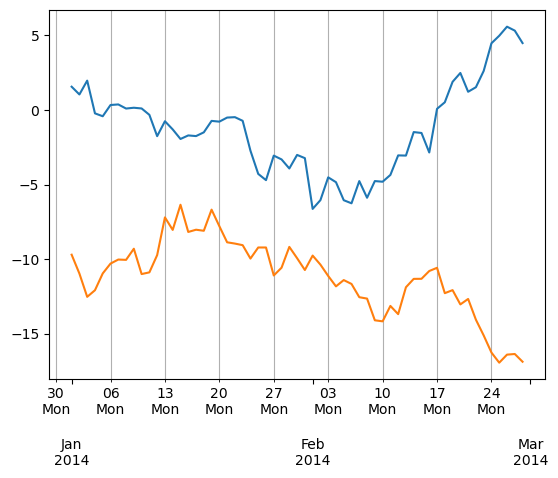

In [23]:
# можно воспользоваться методом .grid() объекта оси х чтобы добавить направляющие линии сетки для промежуточных и основных 
# делений оси.
fig, ax = plt.subplots()
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')
# настраиваем метки промежуточных делений
weekday_locator = WeekdayLocator(byweekday = (0), interval = 1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))
ax.xaxis.grid(True, 'minor') # включает линии сетки для промежуточных делений
ax.xaxis.grid(False, 'major') # отключает линии сетки для основных делений
# настраиваем метки основных делений 
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'))

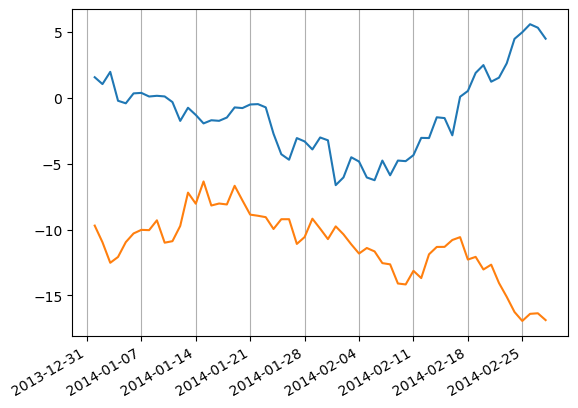

In [24]:
# выведем метки и линии сетки только для основных делений на еженедельной основе и с использованием формата YYYY-MM-DD
# однако, поскольку они будут перекрываться мы повернем их с помощью fig.autofmt_xdate()
fig, ax = plt.subplots()
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')
ax.xaxis.grid(True, 'major')
ax.xaxis.set_major_locator(WeekdayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate();

__ВИДЫ ГРАФИКОВ, ЧАСТО ИСПОЛЬЗУЮЩИЕСЯ В СТАТИСТИЧЕСКОМ АНАЛИЗЕ ДАННЫХ__


__Демонстрация относительных различий с помощью столбиковых диаграмм__

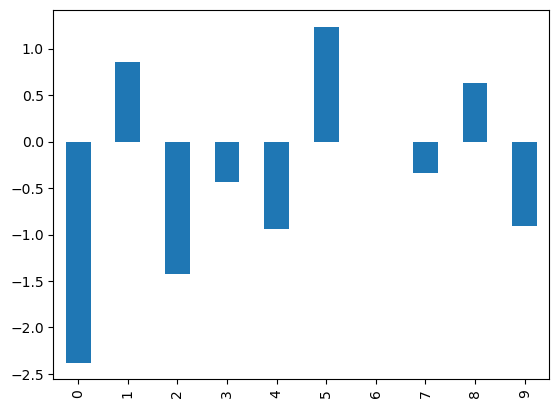

In [25]:
# Столбиковые диаграммы можно создать с помощью параметра kind='bar' метода .plot()
np.random.seed(seedval)
s = pd.Series(np.random.randn(10) - 0.5)
s.plot(kind = 'bar');


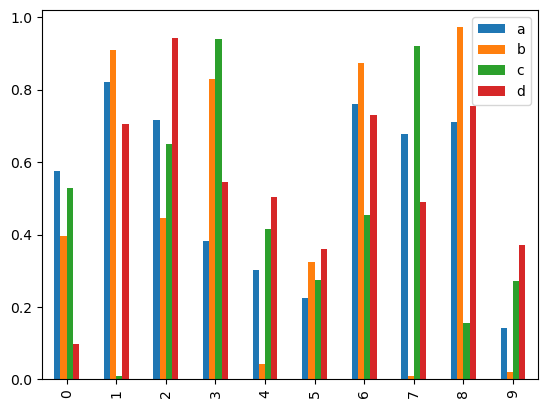

In [26]:
# сгенерируем данные для столбиковой диаграммы на основе нескольких серий
np.random.seed(seedval)
df2 = pd.DataFrame(np.random.rand(10, 4), columns = ['a', 'b', 'c', 'd'])
df2.plot(kind = 'bar');

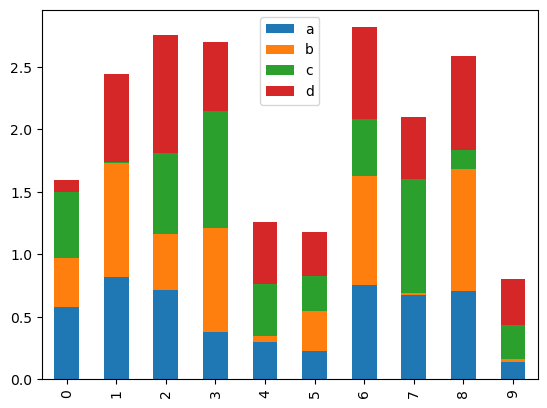

In [27]:
# параметр stacked=True можно использовать для построения состыкованной столбиковой диаграммы
df2.plot(kind = 'bar', stacked = True);

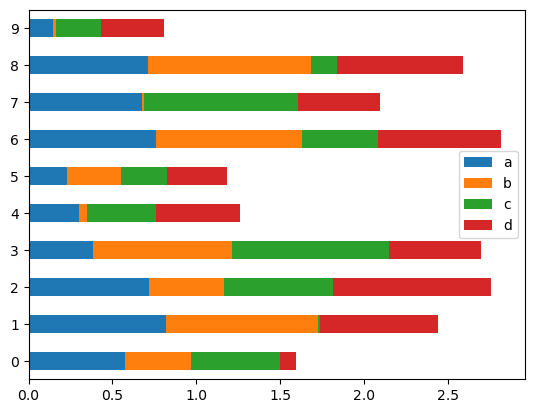

In [28]:
# вертикальную ориентацию диаграммы можно сменить на горизонтальную с помощью значения параметра kind = 'barh'
df2.plot(kind = 'barh', stacked = True);

__Визуализация распределений данных с помощью гистограмм__

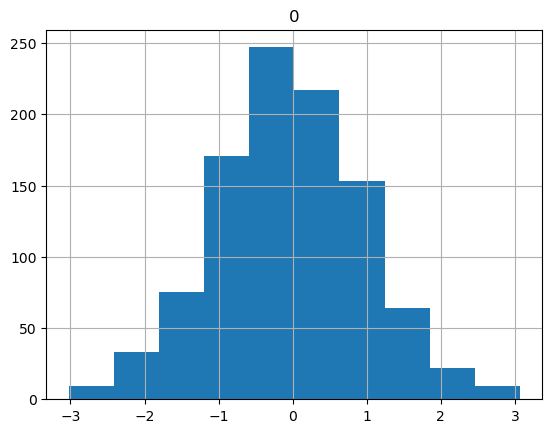

In [29]:
np.random.seed(seedval)
dfh = pd.DataFrame(np.random.randn(1000))
# строим гисторграмму
dfh.hist();

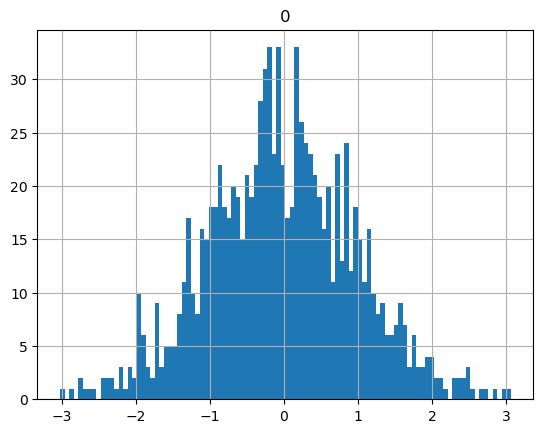

In [30]:
# разрешающую способность гистограммы можно настроить, задав количество интервалов (бинов) по умолчанию колво бинов = 10
dfh.hist(bins = 100);

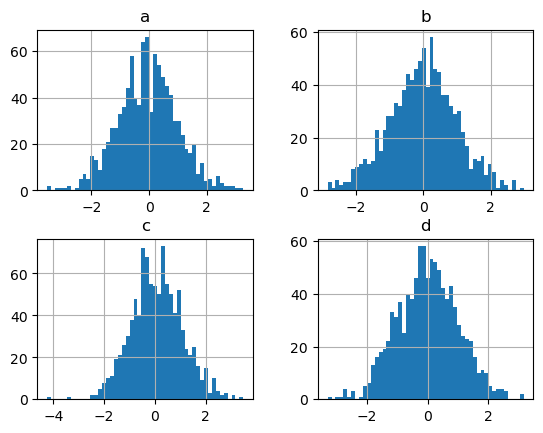

In [31]:
np.random.seed(seedval)
dfh = pd.DataFrame(np.random.randn(1000, 4), columns = ['a', 'b', 'c', 'd'])
dfh.hist(bins = 50);

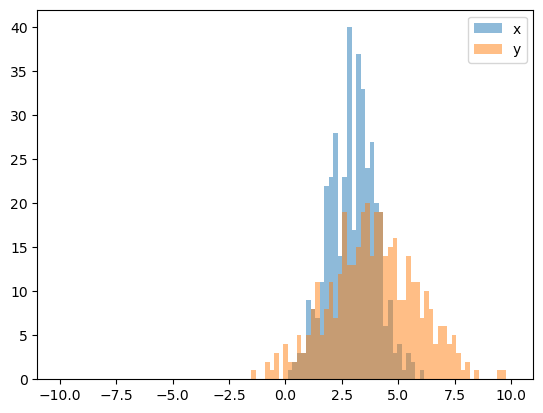

In [32]:
# чтобы наложить несколько гистограмм друг на друга в рамках одного рисунка, вызовите несколько раз функцию
# pyplot.hist() перед вызовом метода .show()
np.random.seed(seedval)
x = [np.random.normal(3, 1) for _ in range(400)]
y = [np.random.normal(4, 2) for _ in range(400)]
# задаем интервалы (диапазон от -10 до 10 и 100 интервалов)
bins = np.linspace(-10, 10, 100)
# строим график с помощью plt.hist, 50% прозрачности
plt.hist(x, bins, alpha = 0.5, label = 'x')
plt.hist(y, bins, alpha = 0.5, label = 'y')
plt.legend(loc = 'upper right');

__Визуализация распределений категориальных данных с помощью ящичных диаграмм с усами__

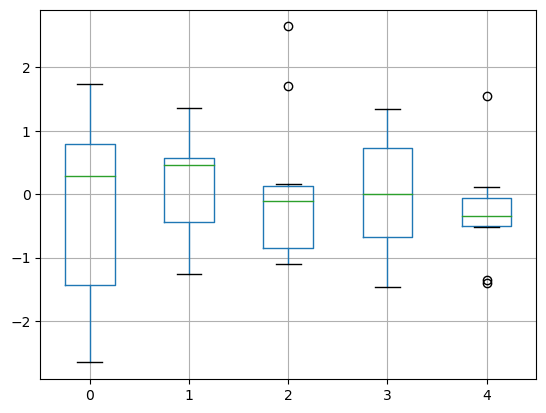

In [33]:
np.random.seed(seedval)
dfb = pd.DataFrame(np.random.randn(10, 5))
# строим ящичную диаграмму
dfb.boxplot(return_type = 'axes');

__Отображение накопленных итогов с помощью площадных диаграмм__

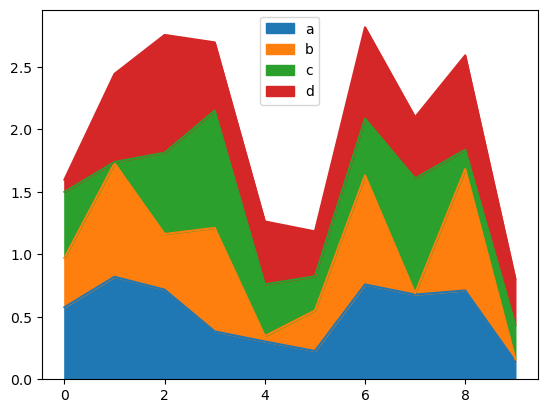

In [34]:
np.random.seed(seedval)
dfa = pd.DataFrame(np.random.rand(10, 4), columns = ['a', 'b', 'c', 'd'])
dfa.plot(kind='area');

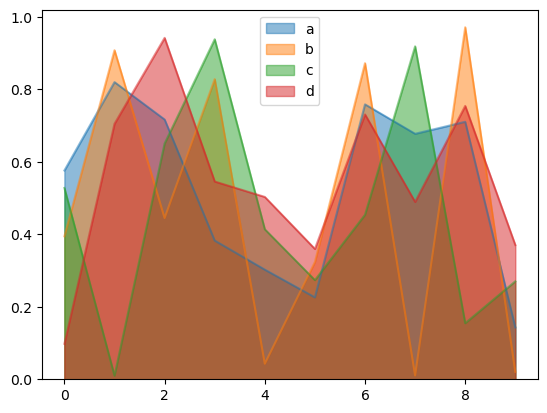

In [35]:
# строим не состыкованную площадную диаграмму с помощью параметра stacked=False
dfa.plot(kind='area', stacked=False);

__Визуализация взаимосвязи между двумя переменными с помощью диаграммы рассеяния__

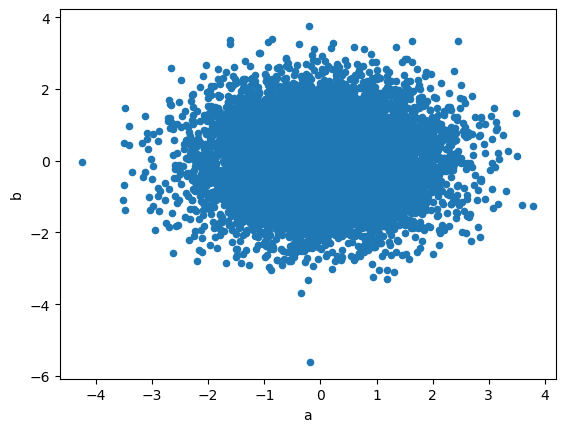

In [36]:
# диаграмма рассеяния визуализирует корреляцию между двумя переменными. при использовании параметра kind='scatter'
np.random.seed(seedval)
sp_df = pd.DataFrame(np.random.randn(10000, 2),
                     columns = ['a', 'b'])
sp_df.plot(kind = 'scatter', x = 'a', y = 'b');

__Визуализация оценок распределения с помощью графика ядерной оценки плотности__

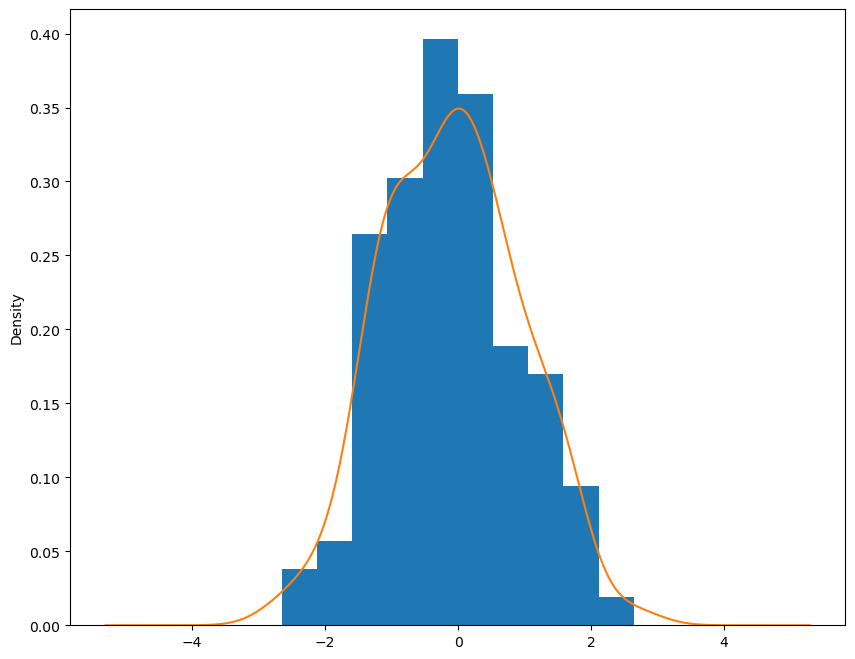

In [37]:
# создаем данные для графика ядерной оценки плотности из 1000 случайных чисел
np.random.seed(seedval)
s = pd.Series(np.random.randn(100))
# строим график
s.hist(density=True) # выводим столбцы
s.plot(kind = 'kde', figsize = (10, 8));

__Визуализация корреляций между несколькими переменными с помощью матрицы диаграмм рассеяния__


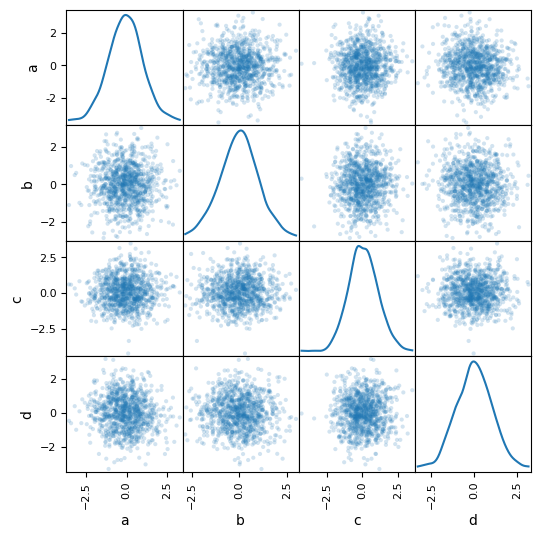

In [38]:
# импортируем класс scatter_matrix
from pandas.plotting import scatter_matrix
np.random.seed(seedval)
df_spm = pd.DataFrame(np.random.randn(1000, 4), columns = ['a', 'b', 'c', 'd'])
# строим матрицу диаграмм рассеяния
scatter_matrix(df_spm, alpha = 0.2, figsize = (6, 6), diagonal = 'kde');

__Отображение взаимосвязей между несколькими переменными с помощью тепловых карт__

__Тепловая карта__ - это графическое представление данных при котором значения внутри матрицы представлены цветами

In [39]:
# создаем данные для теплокарты
s = pd.Series([0.0, 0.1, 0.2, 0.3, 0.4],
              ['V', 'W', 'X', 'Y', 'Z'])
heatmap_data = pd.DataFrame({'A': s + 0.0,
                             'B': s + 0.1,
                             'C': s + 0.2,
                             'D': s + 0.3,
                             'E': s + 0.4,
                             'F': s + 0.5,
                             'G': s + 0.6})
heatmap_data

     A    B    C    D    E    F    G
V  0.0  0.1  0.2  0.3  0.4  0.5  0.6
W  0.1  0.2  0.3  0.4  0.5  0.6  0.7
X  0.2  0.3  0.4  0.5  0.6  0.7  0.8
Y  0.3  0.4  0.5  0.6  0.7  0.8  0.9
Z  0.4  0.5  0.6  0.7  0.8  0.9  1.0

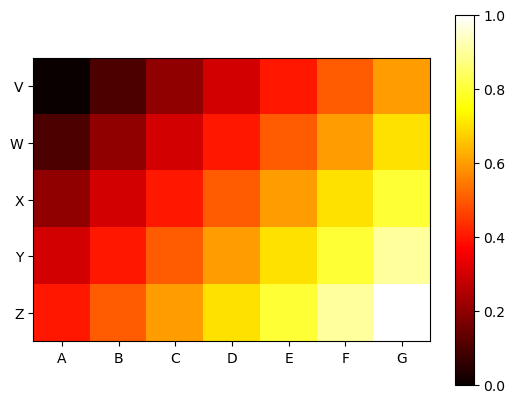

In [40]:
# строим теплокарту
plt.imshow(heatmap_data, cmap = 'hot', interpolation = 'none')
plt.colorbar() # добавим шкалу интенсивности цвета
# задаем метки 
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data)), heatmap_data.index);

__РАЗМЕЩЕНИЕ НЕСКОЛЬКИХ ГРАФИКОВ НА ОДНОМ РИСУНКЕ ВРУЧНУЮ__

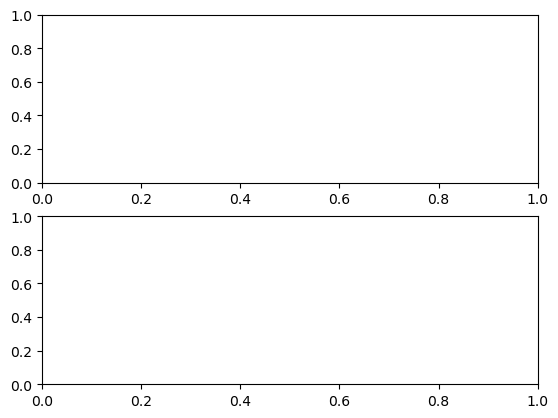

In [42]:
# создаем два подграфика на одном рисунке, используя сетку 2х1 (2 строки один столбец)
# ax1 - верхняя строка
ax1 = plt.subplot2grid(shape = (2, 1), loc = (0, 0))
# ax2 - нижняя строка
ax2 = plt.subplot2grid(shape = (2, 1), loc = (1, 0))

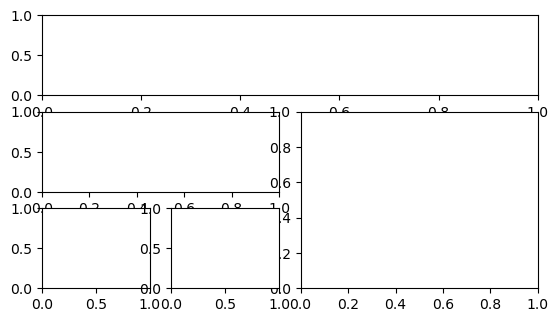

In [44]:
# создаем макет с подграфиками используя сетку 4х4
# ax1 расположен в первой строке, шириной 4 столбца, все 4 столбца объеденины в одну ячейку
ax1 = plt.subplot2grid((4, 4), (0, 0), colspan = 4)
# ax2 расположен во второй строке, крайний слева и имеет ширину в 2 столбца, при этом 2 столбца объединены в одну ячейку
ax2 = plt.subplot2grid((4, 4), (1, 0), colspan = 2)
# ax3 имеет два столбца в ширину и 2 строки в высоту, столбцы и строки объединены 
ax3 = plt.subplot2grid((4, 4), (1, 2), colspan = 2, rowspan = 2)
# ax4 имеет 1 строку в высоту и 1 столбец в ширину, расположен в строке 4 и столбце 0
ax4 = plt.subplot2grid((4, 4), (2, 0))
# ax5 имеет 1 строку в высоту и 1 столбец в ширину, расположен в строке 4 и столбце 1
ax5 = plt.subplot2grid((4, 4), (2, 1));

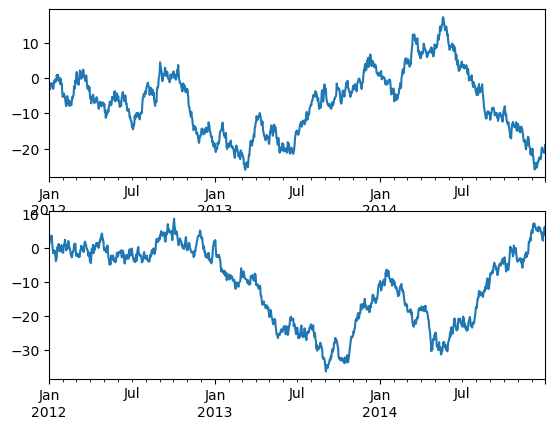

In [45]:
# демонстрируем построение подграфиков, создаем макет используя сетку 2х1
ax6 = plt.subplot2grid((2, 1), (0, 0))
ax7 = plt.subplot2grid((2, 1), (1, 0))
walk_df[walk_df.columns[0]].plot(ax = ax6)
walk_df[walk_df.columns[1]].plot(ax = ax7);